In [2]:
###################
# Import Libraries
###################

import pandas as pd # coding but excel
import numpy as np # number stuff, creates arrays
import matplotlib.pyplot as plt # plotting
from scipy.stats import linregress # lin fit class

# Data Visual Analysis


Measure B to C: 
    Reading         Value
0  0.000029 -1.042520e-08
1  0.000913  9.994000e-06
2  0.001797  1.999490e-05
3  0.002678  2.998590e-05
4  0.003560  3.998850e-05, 
Measure B to Q: 
     Reading         Value
0  0.000023 -1.007610e-08
1  0.000018  9.993950e-06
2  0.000014  1.999520e-05
3  0.000008  2.998570e-05
4  0.000002  3.998870e-05


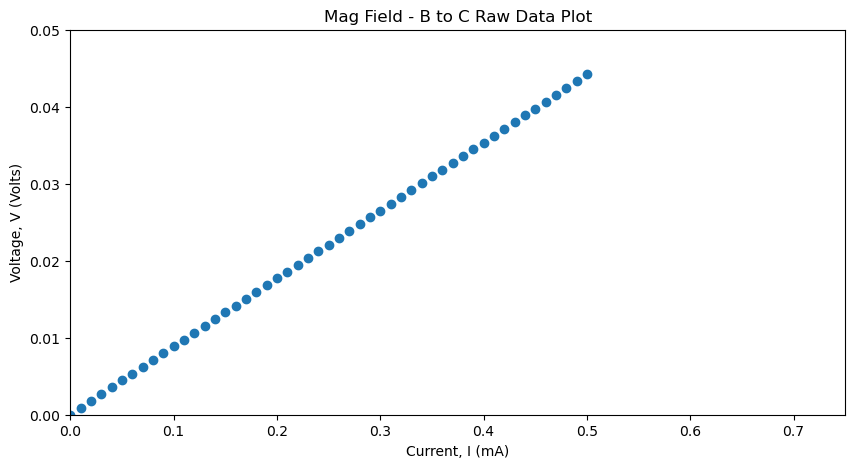

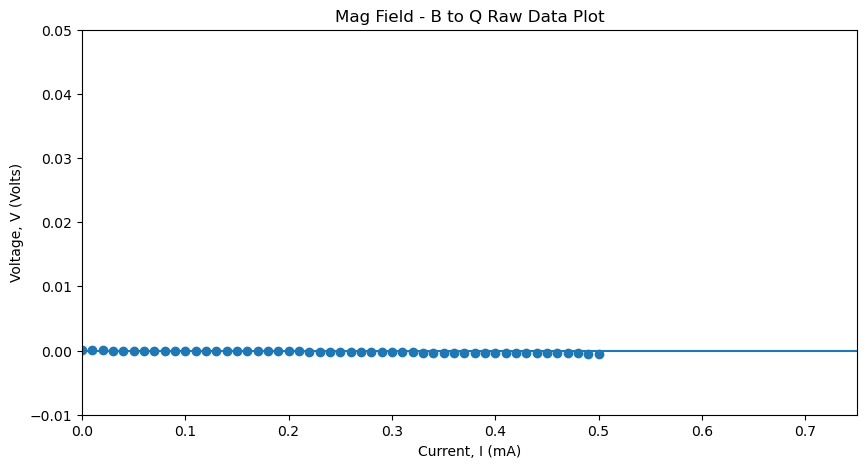

In [16]:
##############
# Import data
##############

BC_df = pd.read_csv("BF-C1-BC.csv")
BQ_df = pd.read_csv("BF-C1-BQ.csv")

print(f"Measure B to C: \n{BC_df.head()}, \nMeasure B to Q: \n {BQ_df.head()}")


##############
# Plot data
##############

BC_x = 1E3*BC_df["Value"] # grab column, we're converting to mA
BC_y = BC_df["Reading"] # grab column
plt.figure(figsize=(10,5)) # set figure size
plt.xlim(0, 0.75) # x axis limits
plt.ylim(0, 0.05) # y axis limits
plt.xlabel("Current, I (mA)") # x axis label
plt.ylabel("Voltage, V (Volts)") # y axis label
plt.title("Mag Field - B to C Raw Data Plot") # plot title
plt.plot(BC_x, BC_y, 'o') # plot data
plt.savefig("BF_C1_BC")
plt.show()

BQ_x = 1E3*BQ_df["Value"] # grab column
BQ_y = BQ_df["Reading"] # grab column
plt.figure(figsize=(10,5)) # set figure size
plt.xlim(0, 0.75) # x axis limits
plt.ylim(-0.01, 0.05) # y axis limits
plt.xlabel("Current, I (mA)") # x axis label
plt.ylabel("Voltage, V (Volts)") # y axis label
plt.title("Mag Field - B to Q Raw Data Plot") # plot title
plt.plot(BQ_x, BQ_y, 'o')
plt.axhline(0)
plt.savefig("BF_C1_BQ")
plt.show()

# Subtracting The Non-Field Data
For the B to Q data we need to subract out the data from ST-C2-BQ which does not have the magnetic field. This should give us just the Hall voltage. I beleive we're expecting a linear graph from this result, where it's not linear currently.

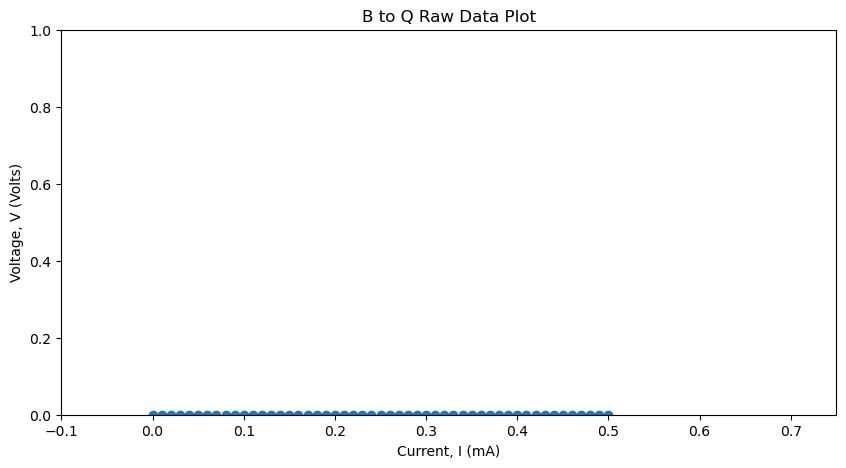

In [4]:
BQ_0_df = pd.read_csv("ST-C2-BQ.csv")
BQ_0_y = BQ_0_df["Reading"]
hv = BQ_y - BQ_0_y

# Plot:
BQ_x = 1E3*BQ_df["Value"] # grab column
plt.figure(figsize=(10,5)) # set figure size
plt.xlim(-0.1, 0.75) # x axis limits
plt.ylim(0, 1) # y axis limits
plt.xlabel("Current, I (mA)") # x axis label
plt.ylabel("Voltage, V (Volts)") # y axis label
plt.title("B to Q Raw Data Plot") # plot title
plt.plot(BQ_x, hv, 'o')
plt.show()

# Data Fitting w/ Uncertainties
We're going to set up our linear fit. Plot it to visualize how awesome it is. To finish we always print our key variables and their uncertainty

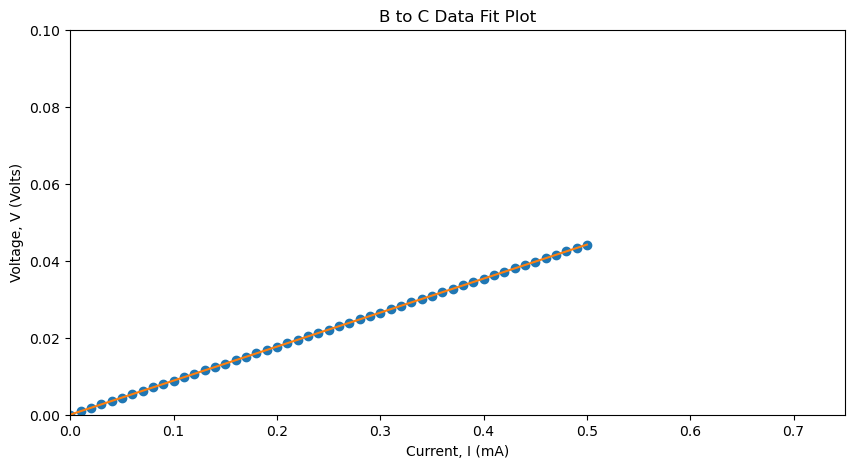

In [19]:
slope, intercept, r_value, p_value, std_err = linregress(BC_x, BC_y)
lin_fit = intercept + slope*BC_x

# Plot Results:
plt.figure(figsize=(10,5)) # set figure size
plt.xlim(0, 0.75) # x axis limits
plt.ylim(0, 0.1) # y axis limits
plt.xlabel("Current, I (mA)") # x axis label
plt.ylabel("Voltage, V (Volts)") # y axis label
plt.title("B to C Data Fit Plot") # plot title
plt.plot(BC_x, BC_y, 'o') # plot data
plt.plot(BC_x, lin_fit) # plot linear fit
plt.savefig("BF_C1_BC_Fit")
plt.show()

In [8]:
print(f"Resistance: {slope}, Uncertainty: {std_err}")

Resistance: 0.08830209573187003, Uncertainty: 7.662238448420408e-06


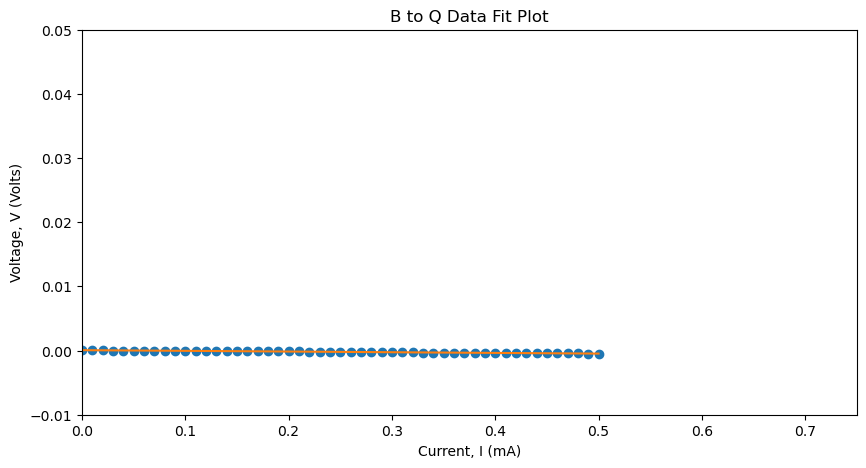

In [20]:
slope, intercept, r_value, p_value, std_err = linregress(BQ_x, BQ_y)
lin_fit = intercept + slope*BQ_x

# Plot Results:
plt.figure(figsize=(10,5)) # set figure size
plt.xlim(0, 0.75) # x axis limits
plt.ylim(0, 0.1) # y axis limits
plt.xlabel("Current, I (mA)") # x axis label
plt.ylabel("Voltage, V (Volts)") # y axis label
plt.title("B to Q Data Fit Plot") # plot title
plt.xlim(0, 0.75) # x axis limits
plt.ylim(-0.01, 0.05) # y axis limits
plt.plot(BQ_x, BQ_y, 'o') # plot data
plt.plot(BQ_x, lin_fit) # plot linear fit
plt.savefig("BF_C1_BQ_Fit")
plt.show()

In [12]:
print(f"Resistance: {slope}, Uncertainty: {std_err}")

Resistance: -0.0010710720409676854, Uncertainty: 1.3816458289384723e-05
